#📌 Extracción

In [660]:
url = "https://raw.githubusercontent.com/DanielDiazLeivaDDL/DanielDiazLeivaDDL-challenge3-data-science-LATAM/main/df_limpio.csv"

import pandas as pd
datos = pd.read_csv(url)


datos.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,ChargesDaily
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


#🔭Análisis Exploratorio

In [661]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [662]:
for col in datos.columns:
    print(f'{col}: {pd.unique(datos[col])}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' nan]
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: [1 0]
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Ba

##Datos Categoricos

In [663]:
from enum import auto
import plotly.express as px

px.histogram(datos, x='Churn',text_auto=True)

In [664]:
px.histogram(datos, x='gender',text_auto=True)

In [665]:
px.histogram(datos, x='InternetService',text_auto=True, color='Churn', barmode='group')

In [666]:
px.histogram(datos, x='PaymentMethod',text_auto=True, color='Churn', barmode='group')

##Datos Numericos

In [667]:
px.box(datos, x='tenure', color='Churn')

In [668]:
px.box(datos, x='Charges.Monthly', color='Churn')

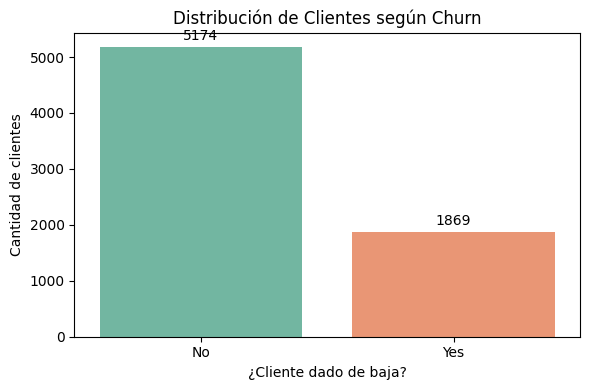

In [669]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=datos, x='Churn', hue='Churn', palette='Set2', legend=False)
plt.title('Distribución de Clientes según Churn')
plt.xlabel('¿Cliente dado de baja?')
plt.ylabel('Cantidad de clientes')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


#🔧 Transformación

In [670]:
datos_nuevo = datos[datos['Churn'].notna()]
datos_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [671]:
datos_nuevo.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,ChargesDaily
0,0002-ORFBO,No,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


##*Limpieza de datos*

###*Correlacion*

In [672]:

X = datos_nuevo.drop(['Churn', 'customerID','Charges.Total'], axis=1)#Conservamos los cargos mensuales unicamente porque parecen mas afin al flujo de efectivo de un negocio (se cobra por mes, no por dia ni por año)
y = datos_nuevo['Churn']


#*OneHotEncoder*

In [673]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


In [674]:
datos_nuevo.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'ChargesDaily'],
      dtype='object')

In [675]:
columnas = X.columns
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'), [ 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']), remainder='passthrough',sparse_threshold=0,force_int_remainder_cols=False)

In [676]:
X = one_hot.fit_transform(X)

In [677]:
one_hot.get_feature_names_out(columnas)


array(['onehotencoder__gender_Male', 'onehotencoder__SeniorCitizen_1',
       'onehotencoder__Partner_1', 'onehotencoder__Dependents_1',
       'onehotencoder__PhoneService_1', 'onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes',
       'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes',
       'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes',
       'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'o

In [678]:
datos_x= pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))
datos_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__gender_Male                              7043 non-null   float64
 1   onehotencoder__SeniorCitizen_1                          7043 non-null   float64
 2   onehotencoder__Partner_1                                7043 non-null   float64
 3   onehotencoder__Dependents_1                             7043 non-null   float64
 4   onehotencoder__PhoneService_1                           7043 non-null   float64
 5   onehotencoder__MultipleLines_No                         7043 non-null   float64
 6   onehotencoder__MultipleLines_No phone service           7043 non-null   float64
 7   onehotencoder__MultipleLines_Yes                        7043 non-null   float64
 8   onehotencoder__InternetService_DSL    

In [679]:

datos_y= pd.DataFrame(y, columns=['Churn'])
datos_y

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [680]:

import pandas as pd

# Seleccionamos solo columnas numéricas
num_cols = datos_x.select_dtypes(include=['int64', 'float64'])

# Calculamos la correlación con remainder__tenure (en lugar de tenure)
correlaciones_tenure = num_cols.corr()['remainder__tenure'].drop('remainder__tenure')

# Reordenamos por valor absoluto (de mayor a menor)
correlaciones_tenure = correlaciones_tenure.reindex(correlaciones_tenure.abs().sort_values(ascending=False).index)

# Mostramos como Serie
print(correlaciones_tenure)

# Convertimos a DataFrame
correlacion_df = pd.DataFrame({
    'Variable': correlaciones_tenure.index,
    'Correlación_con_tenure': correlaciones_tenure.values
})

print(correlacion_df)


onehotencoder__Contract_Month-to-month                   -0.645561
onehotencoder__Contract_Two year                          0.558533
onehotencoder__Partner_1                                  0.379697
onehotencoder__DeviceProtection_Yes                       0.360653
onehotencoder__OnlineBackup_Yes                           0.360277
onehotencoder__MultipleLines_Yes                          0.331941
onehotencoder__OnlineSecurity_Yes                         0.327203
onehotencoder__TechSupport_Yes                            0.324221
onehotencoder__MultipleLines_No                          -0.323088
onehotencoder__DeviceProtection_No                       -0.312740
onehotencoder__OnlineBackup_No                           -0.312694
onehotencoder__StreamingMovies_Yes                        0.286111
onehotencoder__StreamingTV_Yes                            0.279756
onehotencoder__OnlineSecurity_No                         -0.263746
onehotencoder__TechSupport_No                            -0.26

In [681]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [682]:
Churn = pd.DataFrame(y, columns=['Churn'])


#🏗️Construccion de Modelos

#*Baseline*

In [683]:
from sklearn.model_selection import train_test_split


X, X_test, y, y_test = train_test_split(X, y, test_size=0.30,stratify=y, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X, y,stratify=y, random_state=42)


###*DUMMY*

In [684]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

print(dummy_clf.score(X_test, y_test))
print(dummy_clf.score(X_val,y_val))

0.73450070989115
0.7347931873479319


#*Evaluacion modelo dummy*

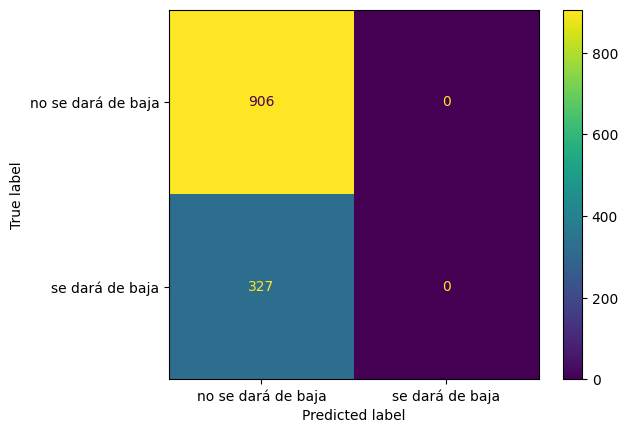

In [685]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_previsto = dummy_clf.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
vis = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['no se dará de baja','se dará de baja'])
vis.plot()

In [686]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(precision_score(y_val,y_previsto))
print(recall_score(y_val,y_previsto))
print(accuracy_score(y_val,y_previsto))

print(f1_score(y_val,y_previsto))


0.0
0.0
0.7347931873479319
0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



#*Arbol de desciciones*

In [687]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=42,max_depth=10)
modelo_arbol.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [688]:
modelo_arbol.score(X_test, y_test)

0.7425461429247515

In [689]:
modelo_arbol.score(X_val, y_val)

0.7550689375506894

In [690]:
modelo_arbol.score(X_train, y_train)

0.8882878009196646

In [691]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



In [692]:
 valores_columnas =  [
    'gender_Male', 'SeniorCitizen_1', 'Partner_1', 'Dependents_1',
    'PhoneService_1', 'MultipleLines_No', 'MultipleLines_No phone service',
    'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic',
    'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service',
    'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service',
    'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service',
    'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service',
    'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service',
    'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service',
    'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
    'Contract_Two year', 'PaperlessBilling_1', 'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check', 'tenure', 'Charges.Monthly', 'Charges.Total',
    'ChargesDaily'
]


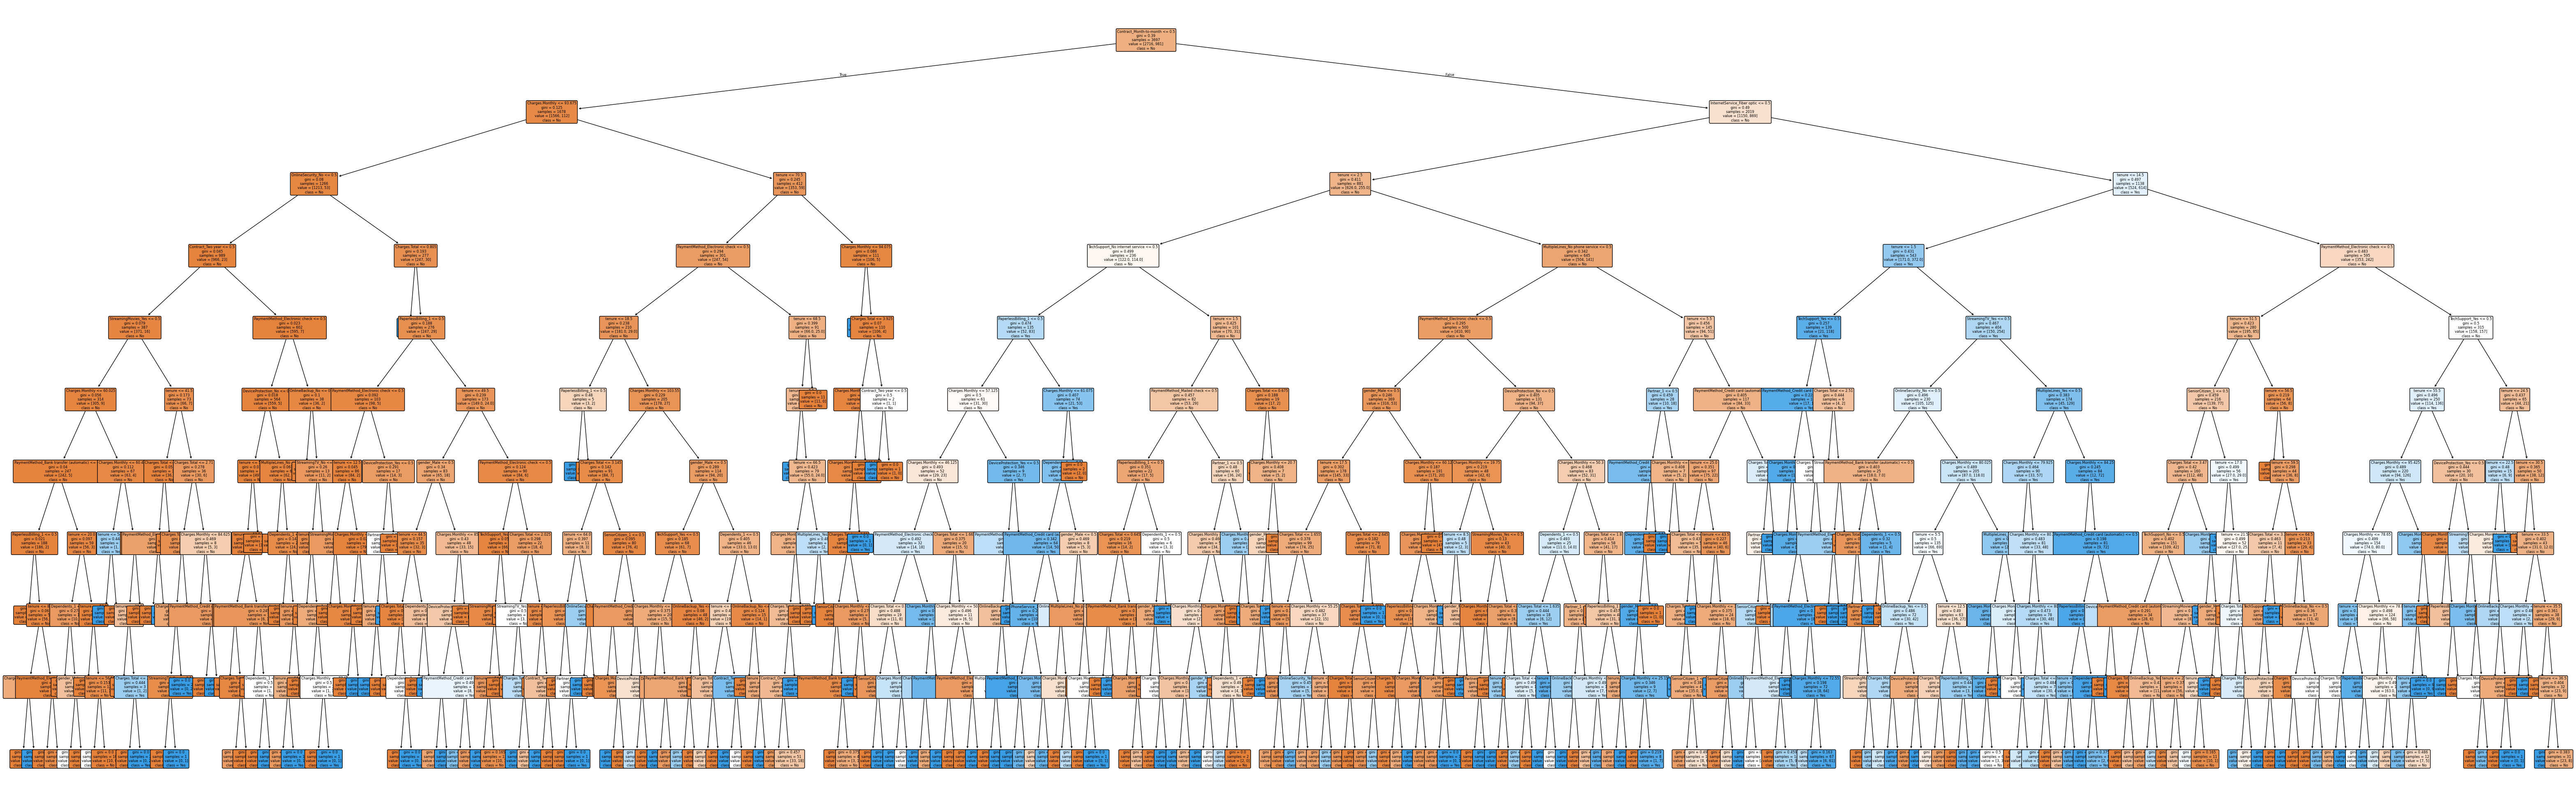

In [693]:
plt.figure(figsize=(80, 25))
plot_tree(modelo_arbol, filled=True, class_names=['No', 'Yes'], fontsize=6, feature_names=valores_columnas, rounded=True)
plt.show()

##*Scoring preliminar*

In [694]:
modelo_arbol.score(X_train, y_train)

0.8882878009196646

In [695]:
modelo_arbol = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [696]:
modelo_arbol.score(X_train, y_train)

0.7890181228022721

In [697]:
modelo_arbol.score(X_test, y_test)

0.7879791765262659

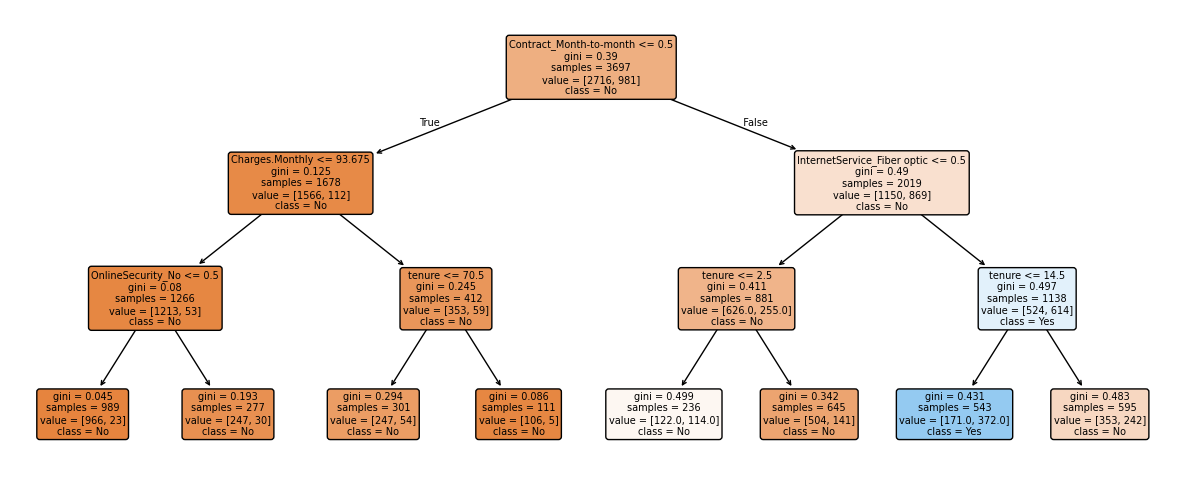

In [698]:
plt.figure(figsize=(15, 6))
plot_tree(modelo_arbol, filled=True, class_names=['No', 'Yes'], fontsize=7, feature_names=valores_columnas, rounded=True)
plt.show()

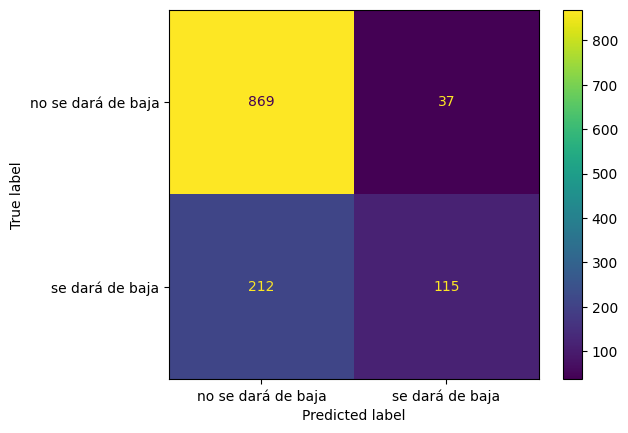

In [699]:

y_previsto = modelo_arbol.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
vis = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['no se dará de baja','se dará de baja'])
vis.plot()

###*Evaluación del Modelo de Arbol*

In [700]:

print(f'Precision : {precision_score(y_val,y_previsto)}')
print(f'Recall : {recall_score(y_val,y_previsto)}')
print(f'Accuracy: {accuracy_score(y_val,y_previsto)}')

print(f'F1 : {f1_score(y_val,y_previsto)}')

Precision : 0.756578947368421
Recall : 0.3516819571865443
Accuracy: 0.7980535279805353
F1 : 0.4801670146137787


In [701]:
from sklearn.metrics import roc_auc_score

print(f'El area bajo la curva ROC es: {roc_auc_score(y_val,y_previsto)}')

El area bajo la curva ROC es: 0.6554215525447071


In [702]:
from sklearn.metrics import classification_report

print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       906
           1       0.76      0.35      0.48       327

    accuracy                           0.80      1233
   macro avg       0.78      0.66      0.68      1233
weighted avg       0.79      0.80      0.77      1233



###*Validacion cruzada Estraitificada*

In [703]:

from sklearn.model_selection import  StratifiedKFold,KFold,cross_validate

modelo = DecisionTreeClassifier(max_depth=10, random_state=42)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_resultados = cross_validate(modelo,X,y,cv=skf, scoring=r'recall')

cv_resultados

{'fit_time': array([0.02357268, 0.02235746, 0.02114034, 0.02150321, 0.02073598]),
 'score_time': array([0.00328422, 0.00325584, 0.0030582 , 0.00296593, 0.00313592]),
 'test_score': array([0.49425287, 0.59386973, 0.50763359, 0.54580153, 0.5648855 ])}

In [704]:
cv_resultados['test_score']

array([0.49425287, 0.59386973, 0.50763359, 0.54580153, 0.5648855 ])

In [705]:
def intervalo_confianza(res):
    promedio  = res['test_score'].mean()
    des_std   = res['test_score'].std()
    lim_inf   = promedio - 2*des_std
    lim_sup   = min(promedio + 2*des_std, 1)  # evita pasar de 1
    return f"El intervalo es: [{lim_inf:.3f}, {lim_sup:.3f}]"


intervalo_confianza(cv_resultados)



'El intervalo es: [0.468, 0.614]'

##*Balanceo de Datos*

###*OverSampling*

In [706]:
from imblearn.over_sampling import SMOTE

OS = SMOTE()
x_balan,y_balan = OS.fit_resample(X,y)



In [707]:
import numpy as np

valores, cuentas = np.unique(y_balan, return_counts=True)
print("Valores:", valores)
print("Frecuencias:", cuentas)
print("Porcentajes:", cuentas / len(y_balan) * 100)


Valores: [0 1]
Frecuencias: [3622 3622]
Porcentajes: [50. 50.]


In [708]:
from imblearn.pipeline import Pipeline as imbpipeline

modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample',SMOTE()),('arbol',modelo)])

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_resultados = cross_validate(pipeline,X,y,cv=skf, scoring=r'recall')

cv_resultados

{'fit_time': array([0.07293868, 0.0578196 , 0.06062102, 0.05719829, 0.07152581]),
 'score_time': array([0.00399995, 0.00386095, 0.00474453, 0.00392437, 0.00386739]),
 'test_score': array([0.63218391, 0.5862069 , 0.58015267, 0.60687023, 0.56870229])}

In [709]:
intervalo_confianza(cv_resultados)

'El intervalo es: [0.550, 0.640]'

###*UnderSampling*

In [710]:
from imblearn.under_sampling import NearMiss



In [711]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample',NearMiss(version = 3)),('arbol',modelo)])

skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_resultados = cross_validate(pipeline,X,y,cv=skf, scoring=r'recall')

cv_resultados

{'fit_time': array([0.05149007, 0.05060625, 0.0518465 , 0.05100441, 0.04832244]),
 'score_time': array([0.00381255, 0.00377703, 0.00453925, 0.00369287, 0.00372839]),
 'test_score': array([0.55938697, 0.63984674, 0.64122137, 0.63740458, 0.63740458])}

In [712]:
intervalo_confianza(cv_resultados)

'El intervalo es: [0.559, 0.687]'

##Scoring definitivo

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1552
           1       0.55      0.58      0.56       561

    accuracy                           0.76      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.77      0.76      0.76      2113



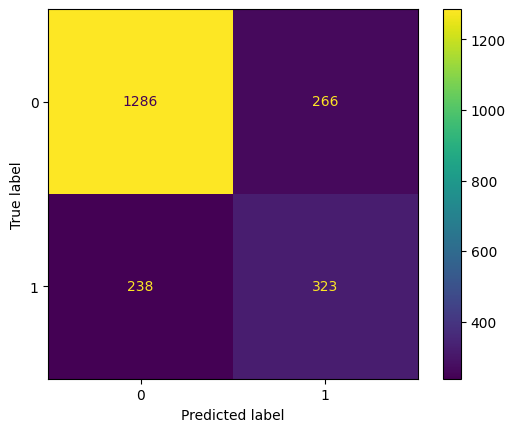

In [713]:
OS = SMOTE()
x_balan,y_balan = OS.fit_resample(X,y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_balan,y_balan)
y_previsto = modelo.predict(X_test)


print(classification_report(y_test,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test,y_previsto);


#*Normalizacion*

In [714]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_val_norm = norm.transform(X_val)
X_test_norm = norm.transform(X_test)

#*KNN*

In [715]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [716]:
X_test_norm = norm.transform(X_test)
modelo_knn.score(X_test_norm, y_test)

0.7562707051585423

In [717]:
modelo_knn.score(X_val_norm, y_val)


0.7583130575831306

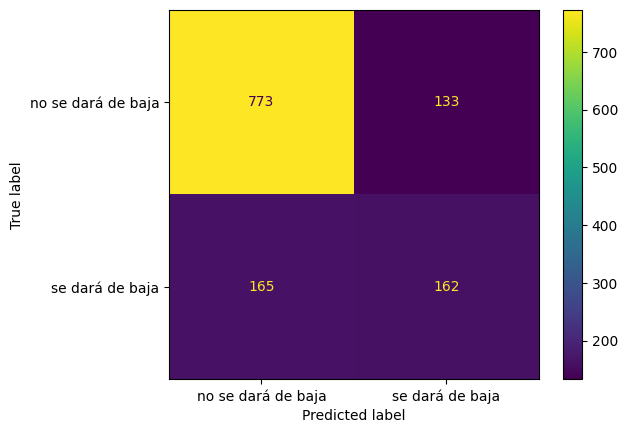

In [718]:

y_previsto = modelo_knn.predict(X_val_norm)
matriz_confusion = confusion_matrix(y_val,y_previsto)
vis = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['no se dará de baja','se dará de baja'])
vis.plot()

#*Modelo Campeon*

In [719]:
Lista = [('Dummy',dummy_clf,X_test,y_test),('Arbol',modelo_arbol,X_test,y_test),('KNN',modelo_knn,X_test_norm,y_test)]
for i in Lista:
  print(i[0],i[1].score(i[2],i[3]))

Dummy 0.73450070989115
Arbol 0.7879791765262659
KNN 0.7562707051585423


In [720]:
import pickle

with open('modelo_onehotencoder.pkl', 'wb') as archivo:
    pickle.dump(one_hot, archivo)

In [721]:
with open('modelo_campeon.pkl', 'wb') as archivo:
    pickle.dump(modelo_arbol, archivo)

In [722]:


nuevo_cliente = pd.DataFrame([{
    'gender': 'Male',
    'SeniorCitizen': 0,
    'Partner': 1,
    'Dependents': 0,
    'PhoneService': 1,
    'MultipleLines': 'Yes',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 1,
    'PaymentMethod': 'Electronic check',
    'tenure': 5,
    'Charges.Monthly': 79.5,
    'Charges.Total': 397.5,
    'ChargesDaily': 2.65
}])
nuevo_cliente

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,Charges.Monthly,Charges.Total,ChargesDaily
0,Male,0,1,0,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,5,79.5,397.5,2.65


In [723]:
modelo_one_hot = pd.read_pickle('modelo_onehotencoder.pkl')
modelo_arbol = pd.read_pickle('modelo_campeon.pkl')

In [724]:
nuevo_cliente = modelo_one_hot.transform(nuevo_cliente)

In [725]:
modelo_arbol.predict(nuevo_cliente)

array([1])

In [726]:
modelo_arbol.predict_proba(nuevo_cliente)

array([[0.31491713, 0.68508287]])

#📊 Carga y análisis

#📄Informe final